<h3>Actividad: Regresión Lineal Múltiple</h3>
Alejandro Pizarro &emsp;A01633784 </br>
Jueves 17 de agosto de 2023

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estadística/Tareas/ds_salaries.csv')

In [ ]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<h2>Ecuación matemática que describe el modelo de regresión lineal a ejecutar.</h2>

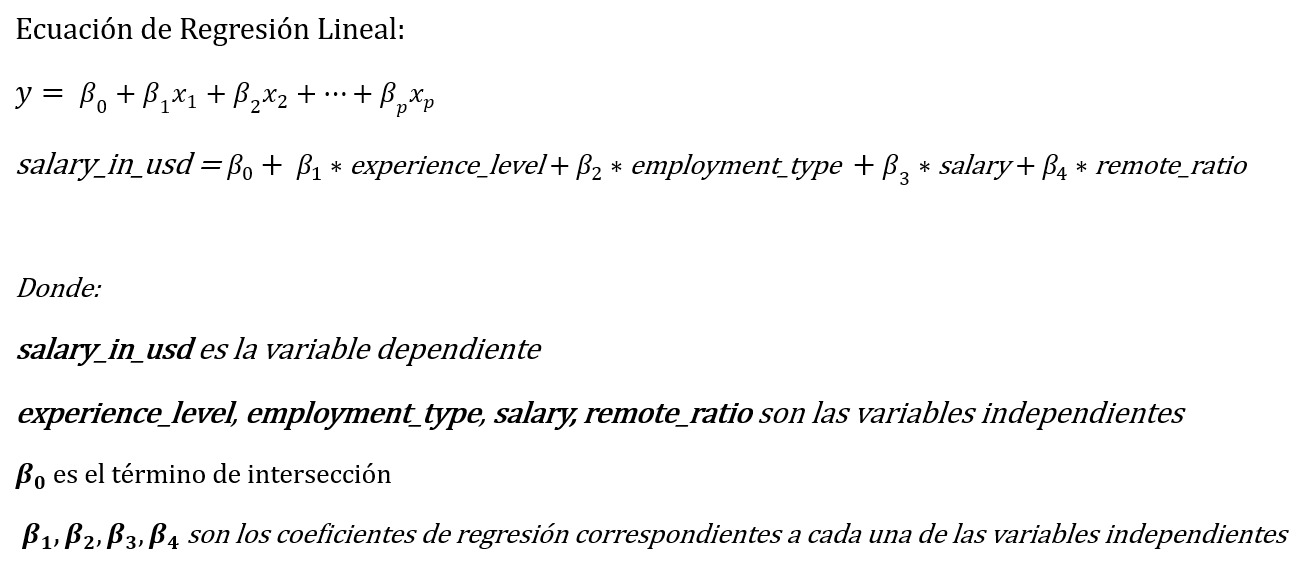

Después eliminamos las columnas que no son requeridas

In [ ]:
df = df.drop(['Unnamed: 0', 'work_year', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], axis=1) # columnas que no se requieren

In [ ]:
df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50
...,...,...,...,...,...
602,SE,FT,154000,154000,100
603,SE,FT,126000,126000,100
604,SE,FT,129000,129000,0
605,SE,FT,150000,150000,100


Buscamos si existen valores faltantes dentro del dataframe

In [ ]:
df.isnull().sum()

experience_level    0
employment_type     0
salary              0
salary_in_usd       0
remote_ratio        0
dtype: int64

Base de datos completa, no se observan valores faltantes

Verificamos las variables regresoras categóricas

In [ ]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

Utilizamos dummies para cambiar los valores de las variables regresoras categóricas a valores numéricos

In [ ]:
dummies_experience_level = pd.get_dummies(df['experience_level'], prefix='experience_level')
dummies_employment_type = pd.get_dummies(df['employment_type'], prefix='employment_type')

In [ ]:
dummies_experience_level

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1


In [ ]:
dummies_employment_type

,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
602,0,0,1,0
603,0,0,1,0
604,0,0,1,0
605,0,0,1,0


In [ ]:
df = pd.concat([df, dummies_experience_level, dummies_employment_type], axis=1)
df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,MI,FT,70000,79833,0,0,0,1,0,0,0,1,0
1,SE,FT,260000,260000,0,0,0,0,1,0,0,1,0
2,SE,FT,85000,109024,50,0,0,0,1,0,0,1,0
3,MI,FT,20000,20000,0,0,0,1,0,0,0,1,0
4,SE,FT,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,SE,FT,154000,154000,100,0,0,0,1,0,0,1,0
603,SE,FT,126000,126000,100,0,0,0,1,0,0,1,0
604,SE,FT,129000,129000,0,0,0,0,1,0,0,1,0
605,SE,FT,150000,150000,100,0,0,0,1,0,0,1,0


In [ ]:
df.drop(['experience_level', 'employment_type'], axis=1, inplace=True)
df.head()

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,70000,79833,0,0,0,1,0,0,0,1,0
1,260000,260000,0,0,0,0,1,0,0,1,0
2,85000,109024,50,0,0,0,1,0,0,1,0
3,20000,20000,0,0,0,1,0,0,0,1,0
4,150000,150000,50,0,0,0,1,0,0,1,0


In [ ]:
df.corr()

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
salary,1.000000,-0.083906,-0.014608,-0.015845,0.014130,0.074626,-0.065995,-0.008268,-0.014568,0.025685,-0.020006
salary_in_usd,-0.083906,1.000000,0.132122,-0.294196,0.259866,-0.252024,0.343513,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,-0.014608,0.132122,1.000000,-0.010490,0.041208,-0.127850,0.113071,0.065149,-0.016865,-0.023834,-0.002935
experience_level_EN,-0.015845,-0.294196,-0.010490,1.000000,-0.087108,-0.302761,-0.381033,0.066013,-0.033537,-0.167828,0.204028
experience_level_EX,0.014130,0.259866,0.041208,-0.087108,1.000000,-0.155539,-0.195751,0.070739,-0.017229,-0.008698,-0.027379
experience_level_MI,0.074626,-0.252024,-0.127850,-0.302761,-0.155539,1.000000,-0.680373,-0.028817,0.068108,-0.006597,-0.013805
experience_level_SE,-0.065995,0.343513,0.113071,-0.381033,-0.195751,-0.680373,1.000000,-0.047768,-0.034520,0.128381,-0.119762
employment_type_CT,-0.008268,0.092907,0.065149,0.066013,0.070739,-0.028817,-0.047768,1.000000,-0.007423,-0.506989,-0.011795
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.033537,-0.017229,0.068108,-0.034520,-0.007423,1.000000,-0.453089,-0.010541
employment_type_FT,0.025685,0.091819,-0.023834,-0.167828,-0.008698,-0.006597,0.128381,-0.506989,-0.453089,1.000000,-0.719987


In [ ]:
correlacion = df.corr()

In [ ]:
alta_corr = np.where((correlacion > 0.95) & (correlacion < 1))
alta_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
baja_corr = np.where((correlacion > -0.95) & (correlacion < -1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

No se ecuentra correlación alta ni correlación baja

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_estandar = scaler.fit_transform(df)
df_estandar = pd.DataFrame(df_estandar, columns=df.columns)


Estandarizamos

In [ ]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)
entrenamiento

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
9,-0.128962,0.179159,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
227,-0.161365,-0.333488,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
591,-0.116096,0.459192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
516,-0.111141,0.567036,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
132,-0.185084,-1.042301,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...
71,-0.185991,-0.988746,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
106,-0.057677,1.059879,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
270,-0.162985,-0.561334,0.714862,2.428524,-0.211543,-0.735261,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
435,-0.164605,-0.291738,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423


In [ ]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = 'salary_in_usd~salary+remote_ratio+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT+employment_type_FL+employment_type_FT', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           8.41e-28
Time:                        00:11:08   Log-Likelihood:                -627.06
No. Observations:                 485   AIC:                             1272.
Df Residuals:                     476   BIC:                             1310.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0167    

Un valor de p **mayor a 0.05** generalmente se considera no significativo

In [ ]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = 'salary_in_usd~salary+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     33.04
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           5.65e-29
Time:                        00:11:08   Log-Likelihood:                -629.63
No. Observations:                 485   AIC:                             1271.
Df Residuals:                     479   BIC:                             1296.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0179    

Dado que el p-valor obtenido en la segunda prueba es menor (0.256), nos quedamos con el p-valor de la primera prueba (0.264)

In [ ]:
y_aprox = 0 - 0.1455 * prueba['salary'] + - 0.3717 * prueba['experience_level_EN'] + 0.1902 * prueba['experience_level_EX'] - 0.3225 * prueba['experience_level_MI'] + 0.0980 * prueba['employment_type_CT']

Obtenemos la ecuación

In [ ]:
y_aprox

563    0.358337
289    0.358832
76    -0.313609
78     0.754617
182   -0.306254
         ...   
249    0.355532
365    0.358493
453   -0.315495
548    0.362222
235   -0.314552
Length: 122, dtype: float64

In [ ]:
tabla = pd.DataFrame({'Real': prueba['salary_in_usd'], 'Prediccion':y_aprox, 'Errores':prueba['salary_in_usd']-y_aprox})

In [ ]:
tabla

,Real,Prediccion,Errores
563,0.394254,0.358337,0.035917
289,0.320205,0.358832,-0.038627
76,-0.173457,-0.313609,0.140152
78,2.224328,0.754617,1.469711
182,-1.217128,-0.306254,-0.910873
...,...,...,...
249,0.813866,0.355532,0.458334
365,0.370981,0.358493,0.012489
453,0.108636,-0.315495,0.424130
548,-0.186856,0.362222,-0.549078


<h2>Análisis de los errores mediante diferentes medios (QQ-plot, histograma, test Kolmogorov etc.). </h2>

Text(0, 0.5, 'Prediccion')

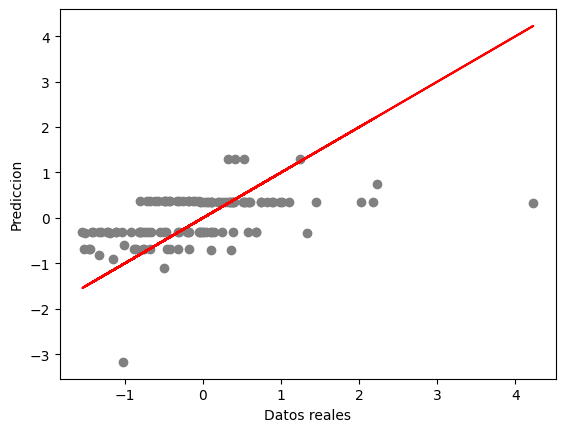

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prueba['salary_in_usd'],y_aprox,color='gray')
plt.plot(prueba['salary_in_usd'],prueba['salary_in_usd'],color='red')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

Interpretación: Tras llevar a cabo la predicción, se puede concluir que el modelo exhibe cierta falta de precisión al ajustarse a los datos reales. Aunque una proporción considerable de los resultados se sitúa dentro de los límites establecidos, no constituye la mayoría de las observaciones.

Text(0, 0.5, 'Valor del residuo')

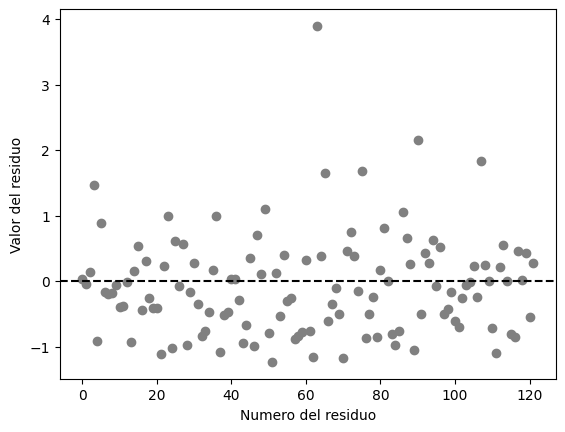

In [ ]:
l_residuos=len(tabla['Errores'])
plt.scatter(range(l_residuos),tabla['Errores'],color='grey')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel('Numero del residuo')
plt.ylabel('Valor del residuo')

Interpretación: Al analizar la gráfica, es evidente que la mayoría de los datos están cercanos a la línea punteada. Esto indica que nuestro modelo aborda de manera medianamente adecuada el contexto en cuestión.

Text(0, 0.5, 'Frecuencia (proba)')

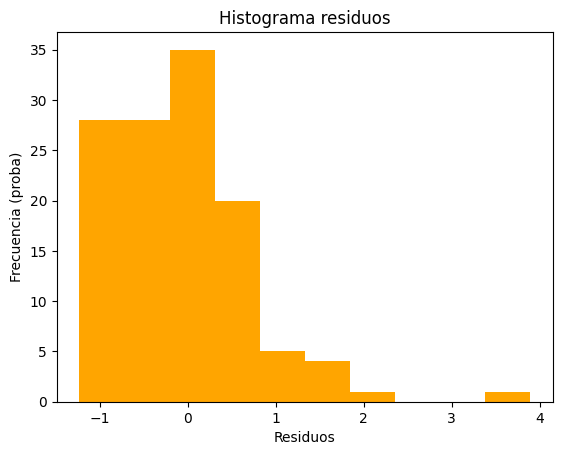

In [ ]:
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (proba)')

Interpretación: Mediante esta gráfica, es posible visualizar la distribución de frecuencia de los residuos, lo que nos permite inferir que a medida que los valores de los residuos disminuyen, su frecuencia (probabilidad) tiende a aumentar.

In [ ]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
Errores_est = (tabla['Errores']-media)/std

In [ ]:
from scipy import stats
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.07596452486918415, pvalue=0.4596761652361583, statistic_location=0.13876738475801315, statistic_sign=1)

Interpretación: Podemos concluir que no hay evidencia sustancial para afirmar que los datos analizados no se adhieren a una distribución normal.

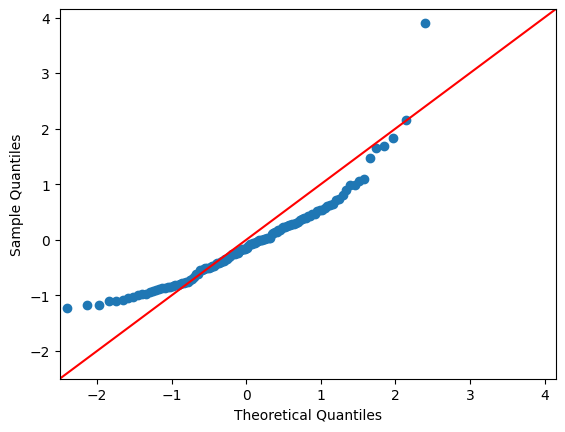

In [ ]:
import statsmodels.api as sm
from scipy import stats
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='45')

Interpretación: La conformidad de los puntos con la línea diagonal en el gráfico QQ sugiere que los errores de los datos se asemejan en gran medida a una distribución normal. Esto implica que los errores podrían estar distribuidos de manera similar a una distribución teórica normal.